## 뉴스 주제 분류 분석

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from konlpy.tag import Twitter
import lightgbm as lgb
import requests
import pandas as pd 
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
def news_data_setting():
    News = pd.read_csv("인공지능 관련 뉴스메타데이터(2013.01.01-2017.08.31).CSV", encoding="cp949")
    News = News.filter(items=["제목","통합 분류1","본문","특성추출"])
    News = News[News['통합 분류1'].notna()]
    News['통합 분류1'] = News['통합 분류1'].replace("경제>국제경제", "경제>경경")
    
    IT = News[News['통합 분류1'].str.contains("IT_과학>")]
    eco = News[News['통합 분류1'].str.contains("경제")]
    spo = News[News['통합 분류1'].str.contains("스포츠>")]
    wol = News[News['통합 분류1'].str.contains("국제")]
    con = News[News['통합 분류1'].str.contains("지역>")]
    so = News[News['통합 분류1'].str.contains("사회")]
    book = News[News['통합 분류1'].str.contains("문화")]
    soc = News[News['통합 분류1'].str.contains("정치")]
    
    IT['class'] = "과학"
    IT['category'] = 1

    eco['class'] = "경제"
    eco['category'] = 2

    spo['class'] = "스포츠"
    spo['category'] = 3

    wol['class'] = "국제"
    wol['category'] = 4

    con['class'] = "지역"
    con['category'] = 5

    so['class'] = "사회"
    so['category'] = 6

    book['class'] = "문화"
    book['category'] = 7

    soc['class'] = "정치"
    soc['category'] = 8
    
    total = pd.concat([IT,eco,spo,wol,con,so,book,soc]).reset_index(drop=True)
    
    return total

total = news_data_setting()

In [3]:
total.tail()

,제목,통합 분류1,본문,특성추출,class,category
45370,일자리·4차 산업혁명·교육…위원회는 `文정부 거울`,정치>청와대,◆ 레이더뉴스 / 文정부 위원회 大해부 ◆ 문재인 대통령이 국정 5개년 계획을 차...,"위원회,청와대,4차,위원장,다음달,일자리,저출산,문재인,북방경제협력위원회,대타협,광...",정치,8
45371,"냉랭한 한일관계, 어떻게 풀어지려나",정치>외교,"우리는 지난 15일 광복 72주년을 보내고, 이제 29일 경술국치일을 맞는다. ...","일본,한일관계,한국,한일,고노,양국간,위안부,문재인,선린,백제,관광객,한국사회,주력...",정치,8
45372,문 대통령 “설계수명 다한 노후원전 연장가동 안한다”,정치>외교,문재인 대통령이 “원전과 화력발전을 줄이고 안전한 미래에너지를 늘려야 한다”고 거듭...,"미국,자유무역협정,중국,기업인,발전소,위원장,사드,경제협력,지방자치단체,신재생,7기...",정치,8
45373,[편집국에서] 사이다만 먹고 살 순 없다,정치>청와대,“공정거래위원회가 (국민들의) 막힌 곳을 뚫어주는 사이다 역할을 하고 있다.” 문재...,"한국,세월호,공정위,기간제,국민들,1류,저성장,가처분,박일근,3류,빅데이터,4차,운...",정치,8
45374,“수직적 권력분산 위해 자치분권 실현 중요”,정치,정순관 대통령소속 지방자치발전위원장은 29일 “자치분권은 시대적 흐름에 부응하는 핵...,"위원장,지방분권,정순관,4차,제2국무회의,지방세,권력분산,수직적,지방이양,인공지능,...",정치,8


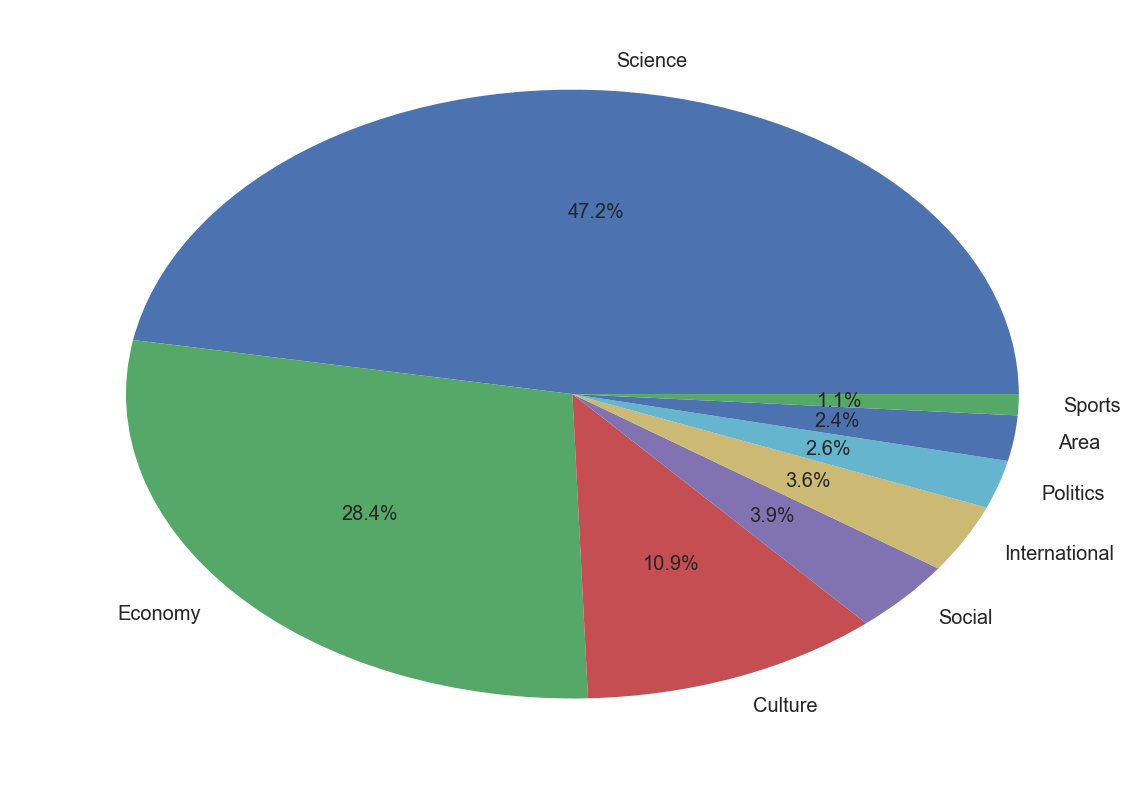

In [123]:
total_v = total['class'].value_counts()
fig = plt.figure(figsize = (10,7))
labels = ['Science','Economy','Culture','Social','International','Politics','Area','Sports',]
plt.pie(total_v, labels=labels ,autopct='%1.1f%%')
plt.show()

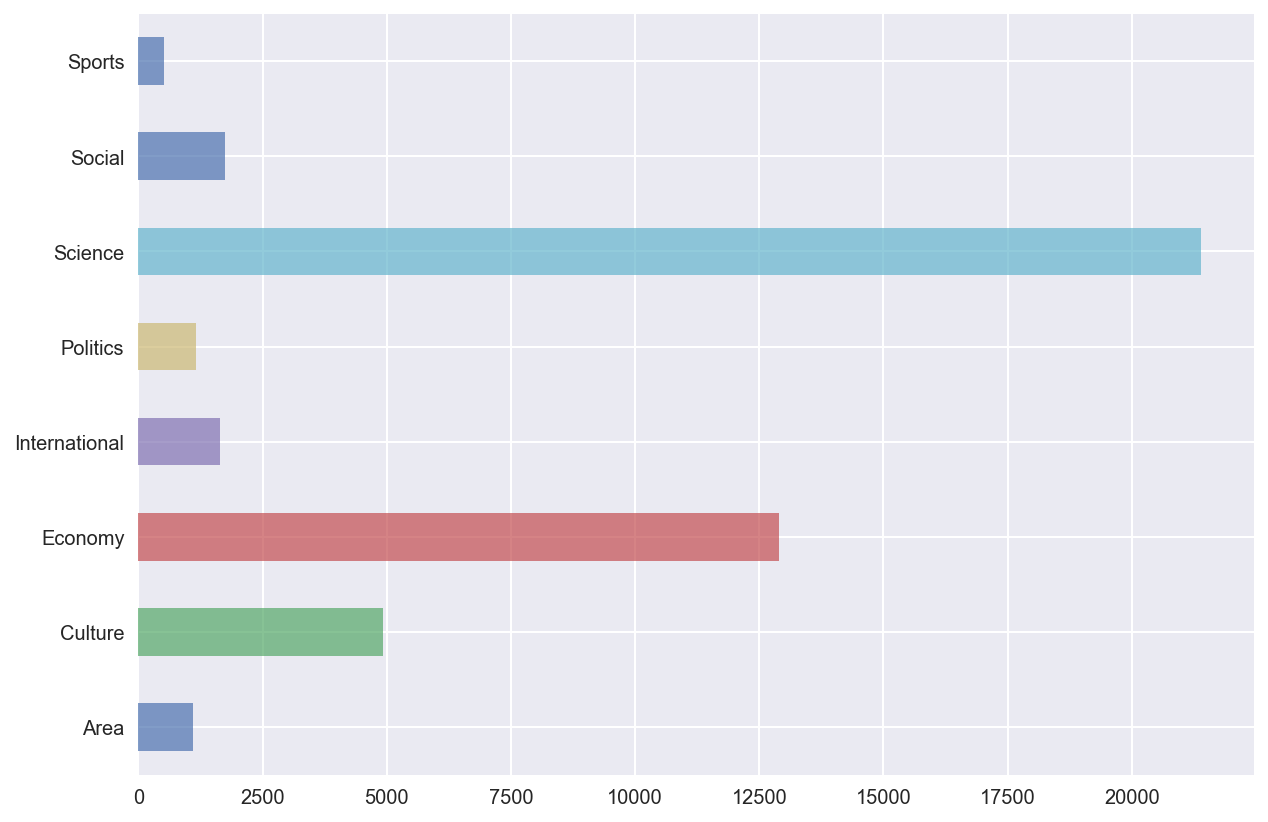

In [132]:
total_v_s = pd.Series({'Science':21397,'Economy':12887,'Culture':4934,'Social':1752,
                       'International':1646,'Politics':1159,'Area':1093,'Sports':507})
fig = plt.figure(figsize = (10,7))
total_v_s.plot(kind="barh", align='center', alpha=0.7)
plt.show()

---

### news 제목

In [4]:
from konlpy.tag import Twitter
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in twitter.pos(doc)]

In [5]:
clf = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,1))), 
    ("clf", MultinomialNB(alpha=0.01))
])

In [6]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(total['제목'], total['category'], \
                                                    test_size=0.4, random_state=0)

len(X_train_a),len(X_test_a),len(y_train_a),len(y_test_a)

(27225, 18150, 27225, 18150)

Train 

Train confusion_matrix 

[[11991   621    18    53    21    22   190    12]
 [ 1423  6138     2    16    24     5    31    20]
 [   25     1   242     9     0     0    15     0]
 [  171    56     5   713     0     2    19    10]
 [  119    46     1     1   467     3    11     2]
 [  191    29     2     2     6   809    32     9]
 [  386    41    19    12     5    17  2464     2]
 [   57    21     0     3     3     0     1   609]] 


Train classification_report 

             precision    recall  f1-score   support

          1       0.83      0.93      0.88     12928
          2       0.88      0.80      0.84      7659
          3       0.84      0.83      0.83       292
          4       0.88      0.73      0.80       976
          5       0.89      0.72      0.79       650
          6       0.94      0.75      0.83      1080
          7       0.89      0.84      0.86      2946
          8       0.92      0.88      0.90       694

avg / total       0.86      0.86      0.86    

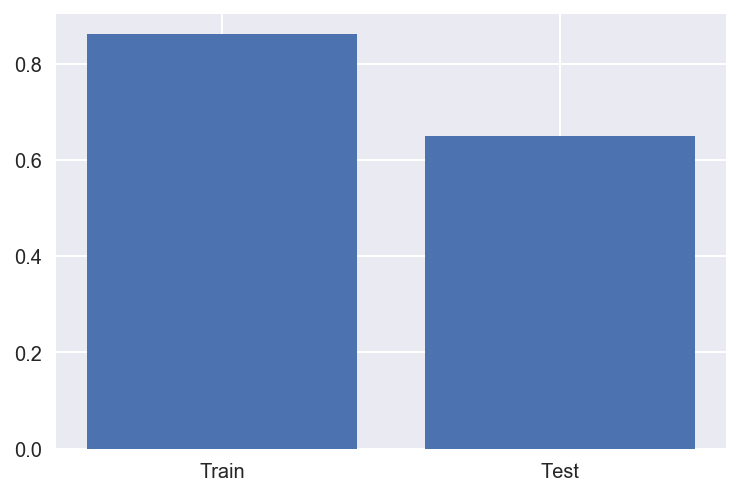

In [7]:
# def news_name():
model_a = clf.fit(X_train_a, y_train_a)

y_pred_a = model_a.predict(X_train_a)

print("Train", "\n")
print("Train confusion_matrix", "\n")
print(confusion_matrix(y_train_a, y_pred_a), "\n\n")
print("Train classification_report", "\n")
print(classification_report(y_train_a, y_pred_a), "\n\n")
print("Train accuracy_score", "\n")
print(round(accuracy_score(y_train_a, y_pred_a), 2), "\n\n")

print("=====================================================" , "\n\n")

y_pred_a_T = model_a.predict(X_test_a)

print("Test", "\n")
print("Test confusion_matrix", "\n")
print(confusion_matrix(y_test_a, y_pred_a_T), "\n\n")
print("Test classification_report", "\n")
print(classification_report(y_test_a, y_pred_a_T), "\n\n")
print("Test accuracy_score", "\n")
print(round(accuracy_score(y_test_a, y_pred_a_T), 2), "\n\n")

x="Train","Test"
y=accuracy_score(y_train_a, y_pred_a), accuracy_score(y_test_a, y_pred_a_T)
plt.bar(x,y)
plt.show()

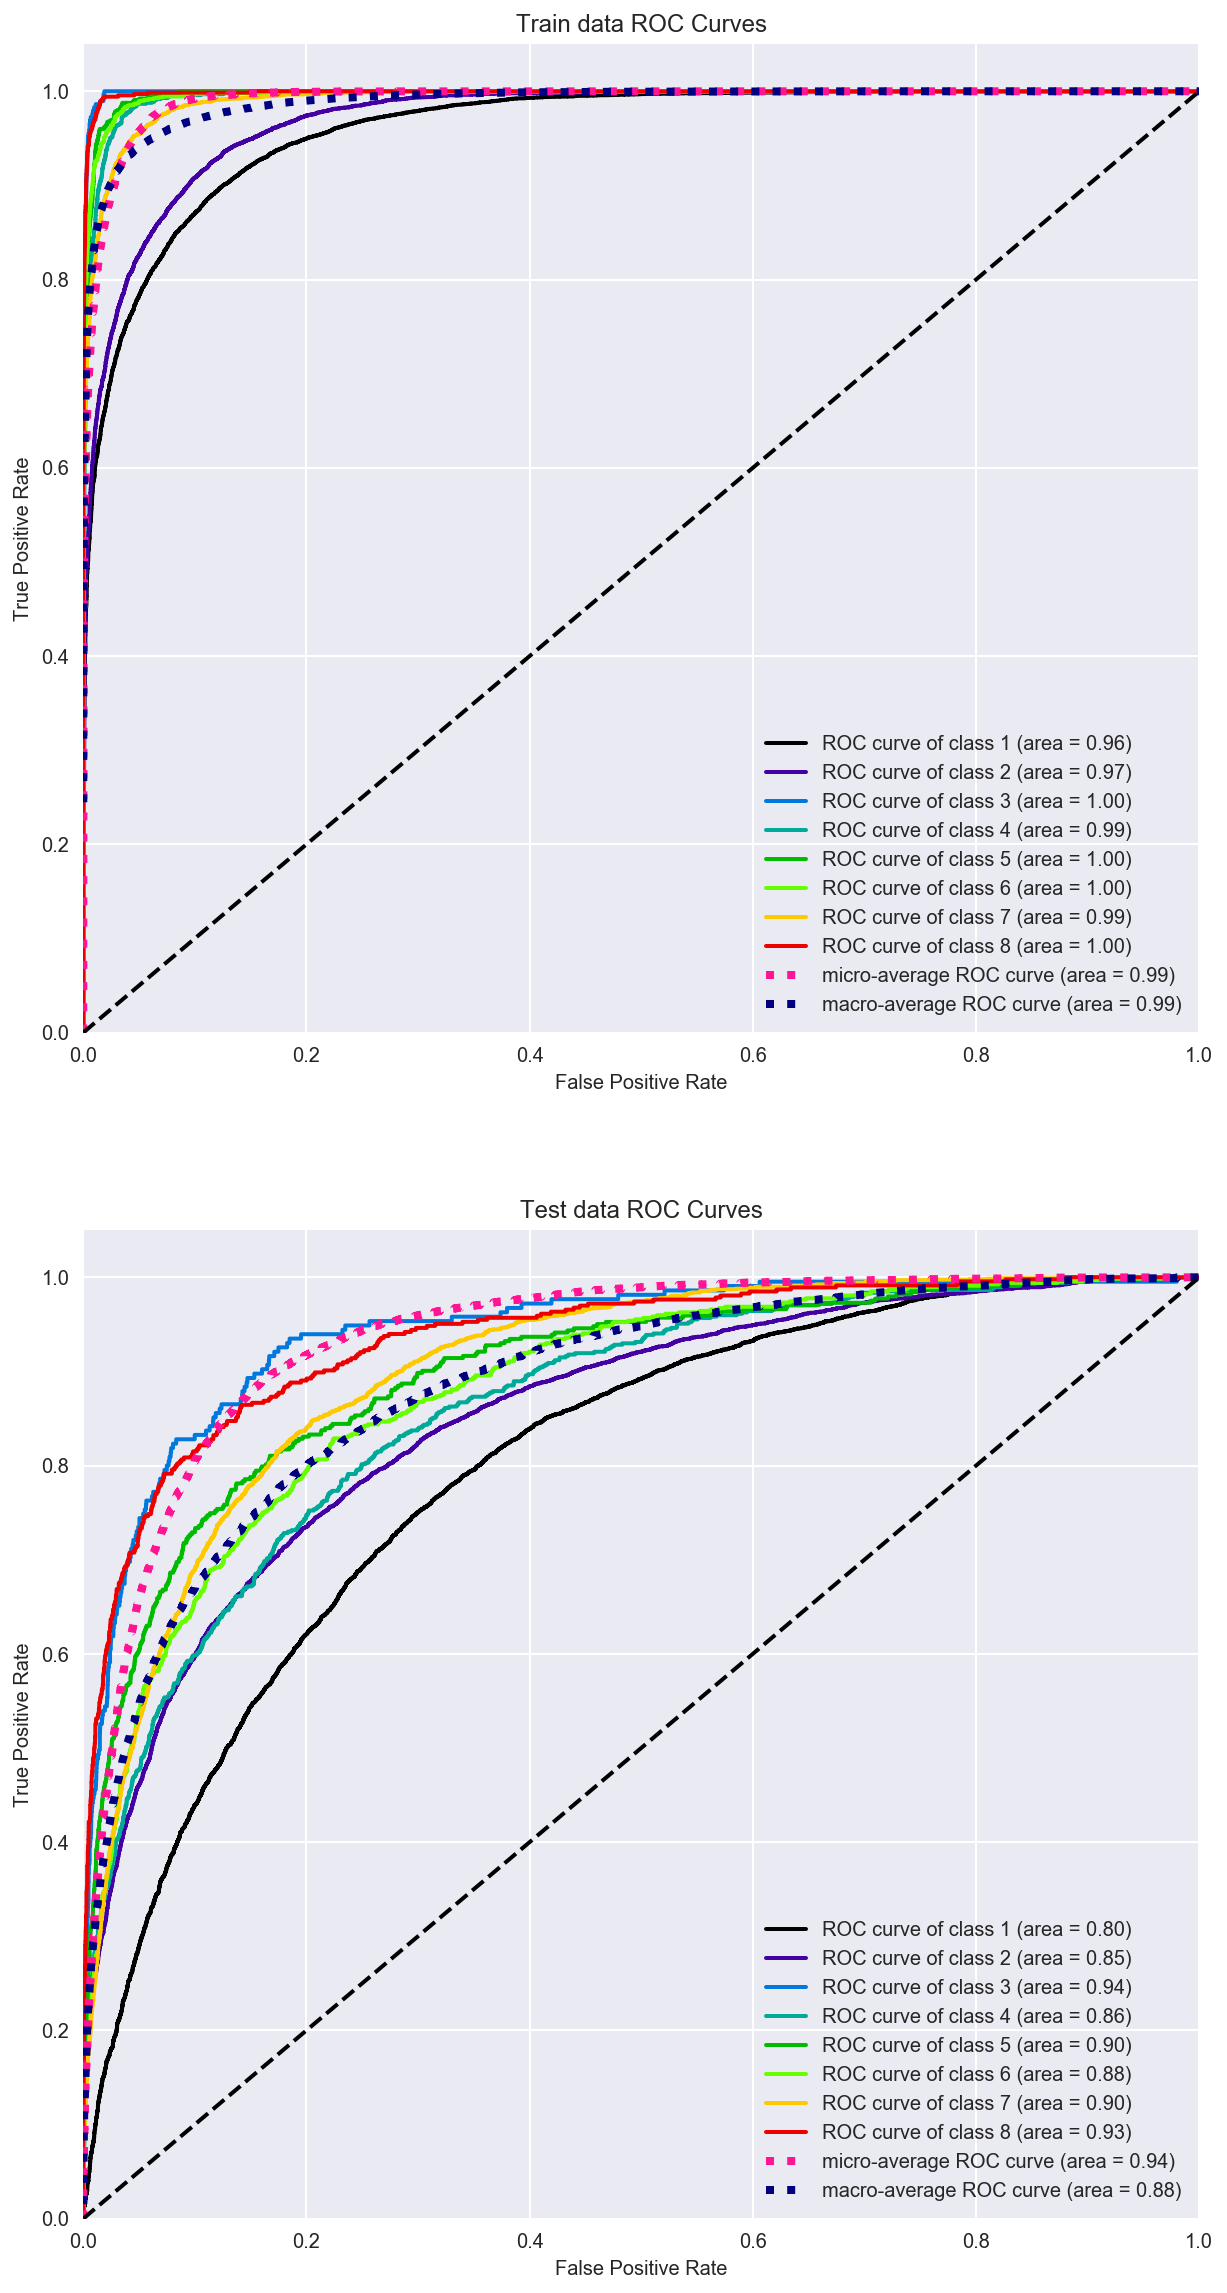

In [8]:
import scikitplot as skplt

fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

y_probas = model_a.predict_proba(X_train_a)
y_probas_T = model_a.predict_proba(X_test_a)

skplt.metrics.plot_roc_curve(y_train_a, y_probas, ax=ax1, title='Train data ROC Curves')

skplt.metrics.plot_roc_curve(y_test_a, y_probas_T, ax=ax2, title='Test data ROC Curves')

plt.show()

---

### news 특성추출

In [9]:
from konlpy.tag import Twitter
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in twitter.pos(doc)]

In [10]:
clf = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,1))), 
    ("clf", MultinomialNB(alpha=0.01))
])

In [11]:
X_train_cha, X_test_cha, y_train_cha, y_test_cha = train_test_split(total['특성추출'], total['category'], \
                                                    test_size=0.4, random_state=0)

len(X_train_cha),len(X_test_cha),len(y_train_cha),len(y_test_cha)

(27225, 18150, 27225, 18150)

Train 

Train confusion_matrix 

[[11925   624    43    65    49    61   149    12]
 [ 1169  6378     6    11    43    14    20    18]
 [    7     1   272     8     1     0     3     0]
 [   97    50    13   799     0     2     7     8]
 [   45    26     2     3   559     4     8     3]
 [   93    29     9     7     6   918    15     3]
 [  239    29    27    18     8    22  2601     2]
 [   28    15     1     1     3     0     2   644]] 


Train classification_report 

             precision    recall  f1-score   support

          1       0.88      0.92      0.90     12928
          2       0.89      0.83      0.86      7659
          3       0.73      0.93      0.82       292
          4       0.88      0.82      0.85       976
          5       0.84      0.86      0.85       650
          6       0.90      0.85      0.87      1080
          7       0.93      0.88      0.90      2946
          8       0.93      0.93      0.93       694

avg / total       0.89      0.89      0.88    

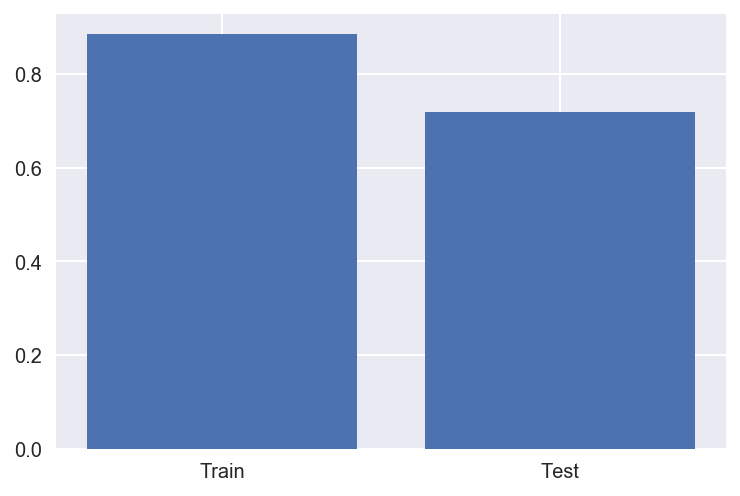

In [12]:
# def news_cha():
model_cha = clf.fit(X_train_cha, y_train_cha)

y_pred_cha = model_cha.predict(X_train_cha)

print("Train", "\n")
print("Train confusion_matrix", "\n")
print(confusion_matrix(y_train_cha, y_pred_cha), "\n\n")
print("Train classification_report", "\n")
print(classification_report(y_train_cha, y_pred_cha), "\n\n")
print("Train accuracy_score", "\n")
print(round(accuracy_score(y_train_cha, y_pred_cha), 2), "\n\n")

print("=====================================================" , "\n\n")

y_pred_cha_T = model_cha.predict(X_test_cha)

print("Test", "\n")
print("Test confusion_matrix", "\n")
print(confusion_matrix(y_test_cha, y_pred_cha_T), "\n\n")
print("Test classification_report", "\n")
print(classification_report(y_test_cha, y_pred_cha_T), "\n\n")
print("Test accuracy_score", "\n")
print(round(accuracy_score(y_test_cha, y_pred_cha_T), 2), "\n\n")

x="Train","Test"
y=accuracy_score(y_train_cha, y_pred_cha), accuracy_score(y_test_cha, y_pred_cha_T)
plt.bar(x,y)
plt.show()

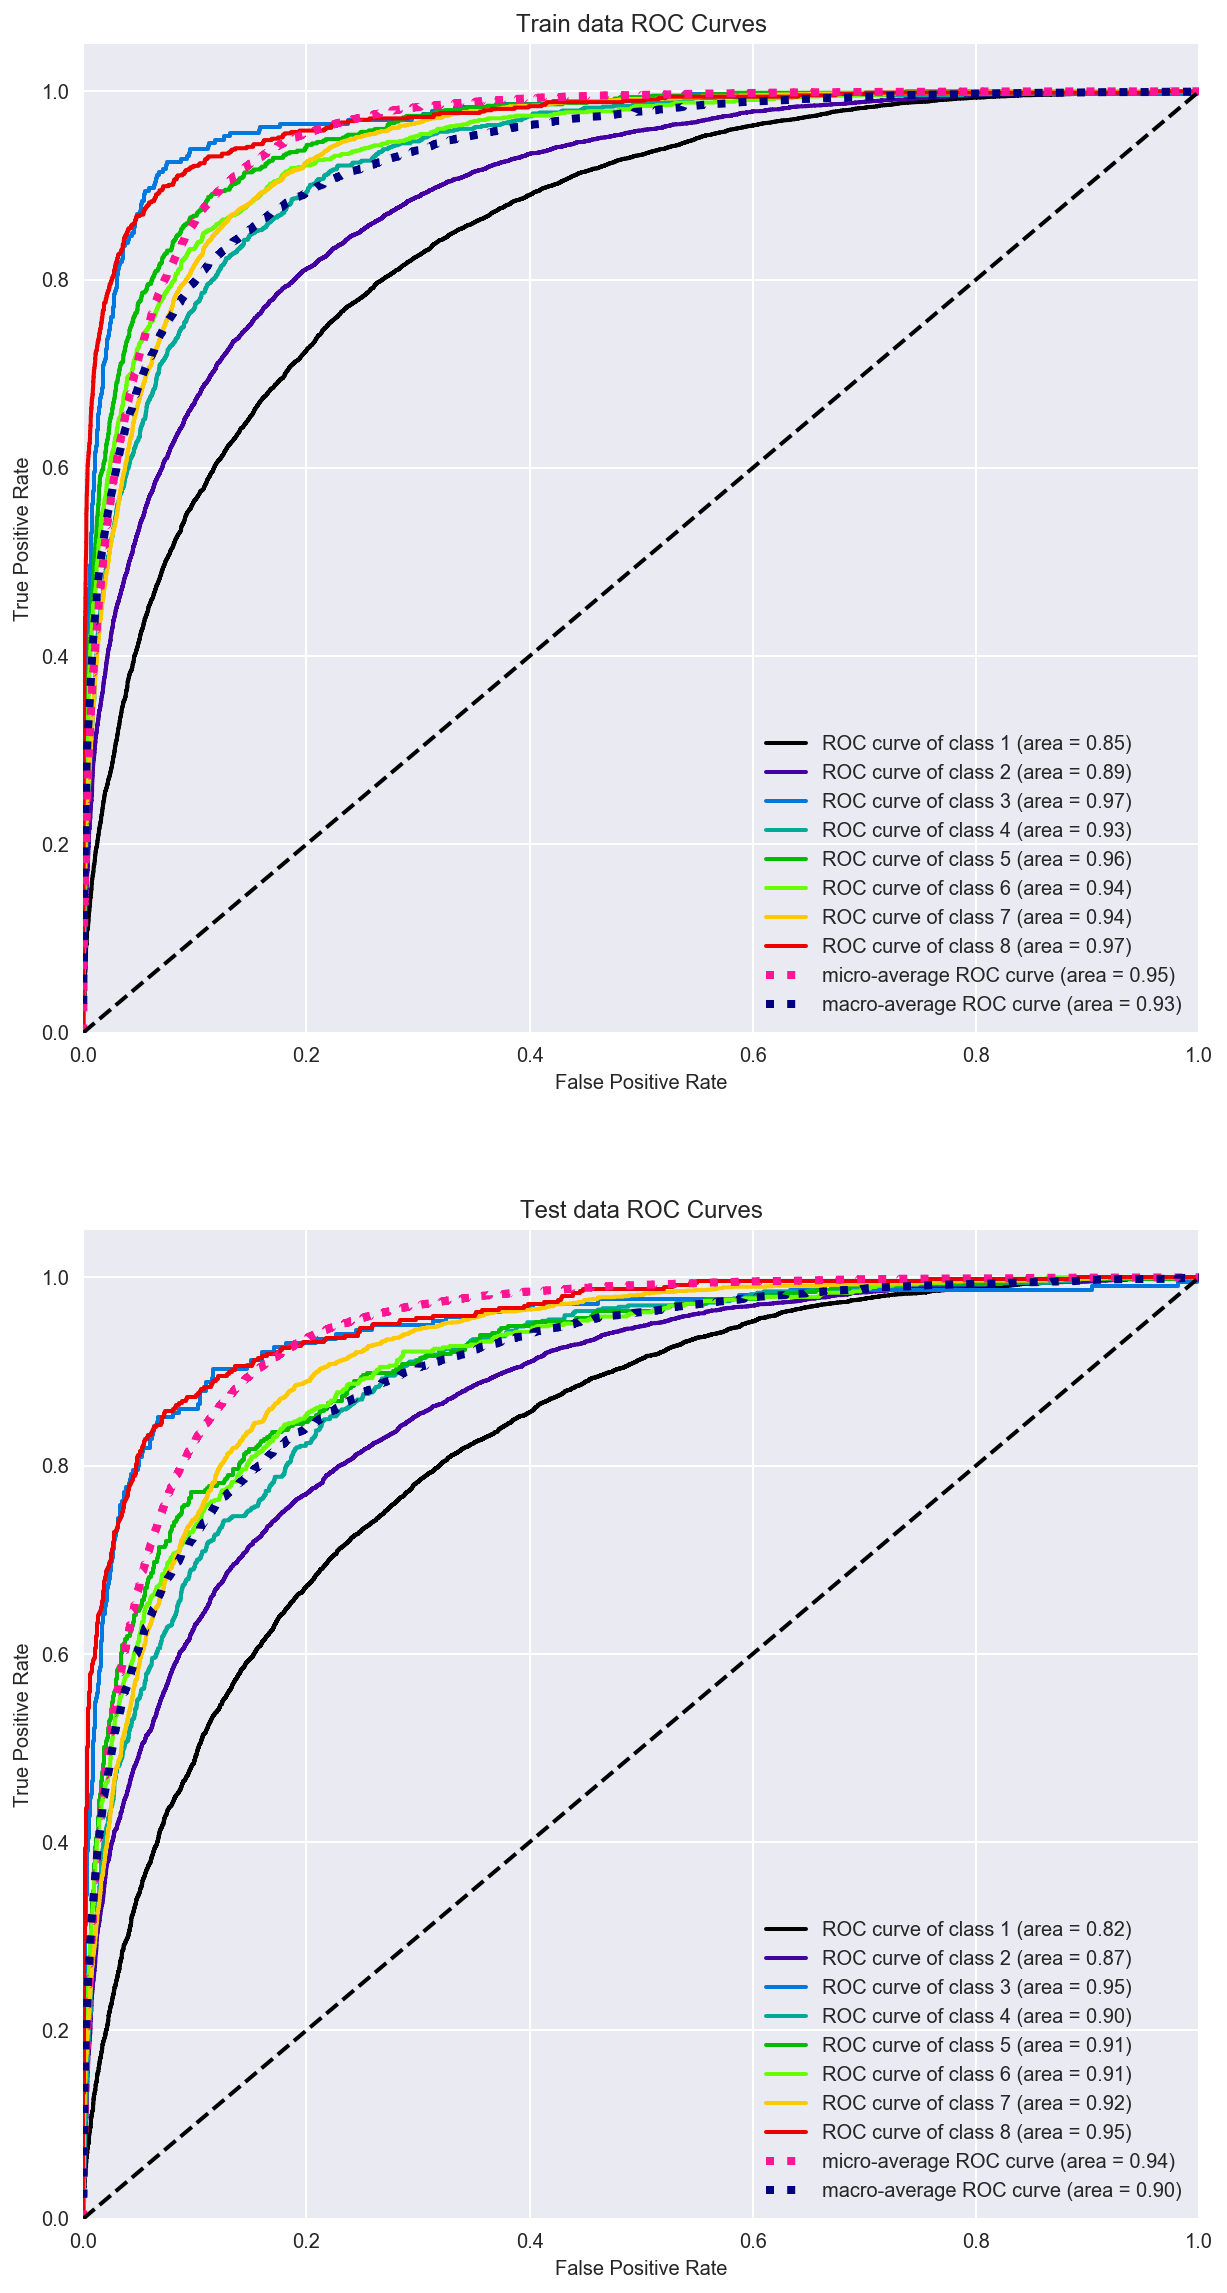

In [13]:
import scikitplot as skplt

fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

y_probas = model_a.predict_proba(X_train_cha)
y_probas_T = model_a.predict_proba(X_test_cha)

skplt.metrics.plot_roc_curve(y_train_cha, y_probas, ax=ax1, title='Train data ROC Curves')

skplt.metrics.plot_roc_curve(y_test_cha, y_probas_T, ax=ax2, title='Test data ROC Curves')

plt.show()

---

### news 본문

In [14]:
from konlpy.tag import Twitter
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in twitter.pos(doc)]

In [15]:
clf = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,2))), 
    ("clf", MultinomialNB(alpha=0.01))
])

In [16]:
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(total['본문'], total['category'], \
                                                    test_size=0.1, random_state=0)

len(X_train_F),len(X_test_F),len(y_train_F),len(y_test_F)

(40837, 4538, 40837, 4538)

Train 

Train confusion_matrix 

[[18613   235    36    77    50    39   169     8]
 [  162 11371     6    12    30    10    32    14]
 [    1     2   454     3     0     0     1     0]
 [    8    11     1  1456     0     2     2     3]
 [    7     4     2     2   943     1     9     1]
 [    3     7     4     2     6  1551     5     2]
 [   33    10     9    10     8     7  4382     2]
 [    3     2     0     0     1     0     0  1013]] 


Train classification_report 

             precision    recall  f1-score   support

          1       0.99      0.97      0.98     19227
          2       0.98      0.98      0.98     11637
          3       0.89      0.98      0.93       461
          4       0.93      0.98      0.96      1483
          5       0.91      0.97      0.94       969
          6       0.96      0.98      0.97      1580
          7       0.95      0.98      0.97      4461
          8       0.97      0.99      0.98      1019

avg / total       0.97      0.97      0.97    

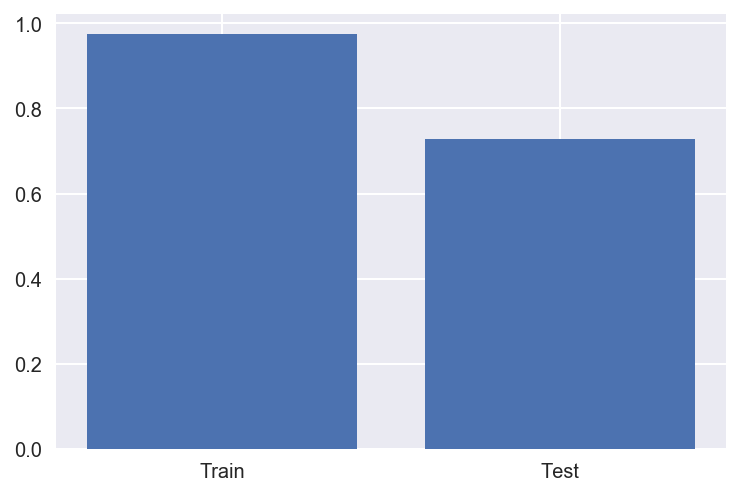

In [17]:
# def news_con():
model_F = clf.fit(X_train_F, y_train_F)

y_pred_F = model_F.predict(X_train_F)

print("Train", "\n")
print("Train confusion_matrix", "\n")
print(confusion_matrix(y_train_F, y_pred_F), "\n\n")
print("Train classification_report", "\n")
print(classification_report(y_train_F, y_pred_F), "\n\n")
print("Train accuracy_score", "\n")
print(round(accuracy_score(y_train_F, y_pred_F), 2), "\n\n")

print("=====================================================" , "\n\n")

y_pred_F_T = model_F.predict(X_test_F)

print("Test", "\n")
print("Test confusion_matrix", "\n")
print(confusion_matrix(y_test_F, y_pred_F_T), "\n\n")
print("Test classification_report", "\n")
print(classification_report(y_test_F, y_pred_F_T), "\n\n")
print("Test accuracy_score", "\n")
print(round(accuracy_score(y_test_F, y_pred_F_T), 2), "\n\n")

x="Train","Test"
y=accuracy_score(y_train_F, y_pred_F), accuracy_score(y_test_F, y_pred_F_T)
plt.bar(x,y)
plt.show()

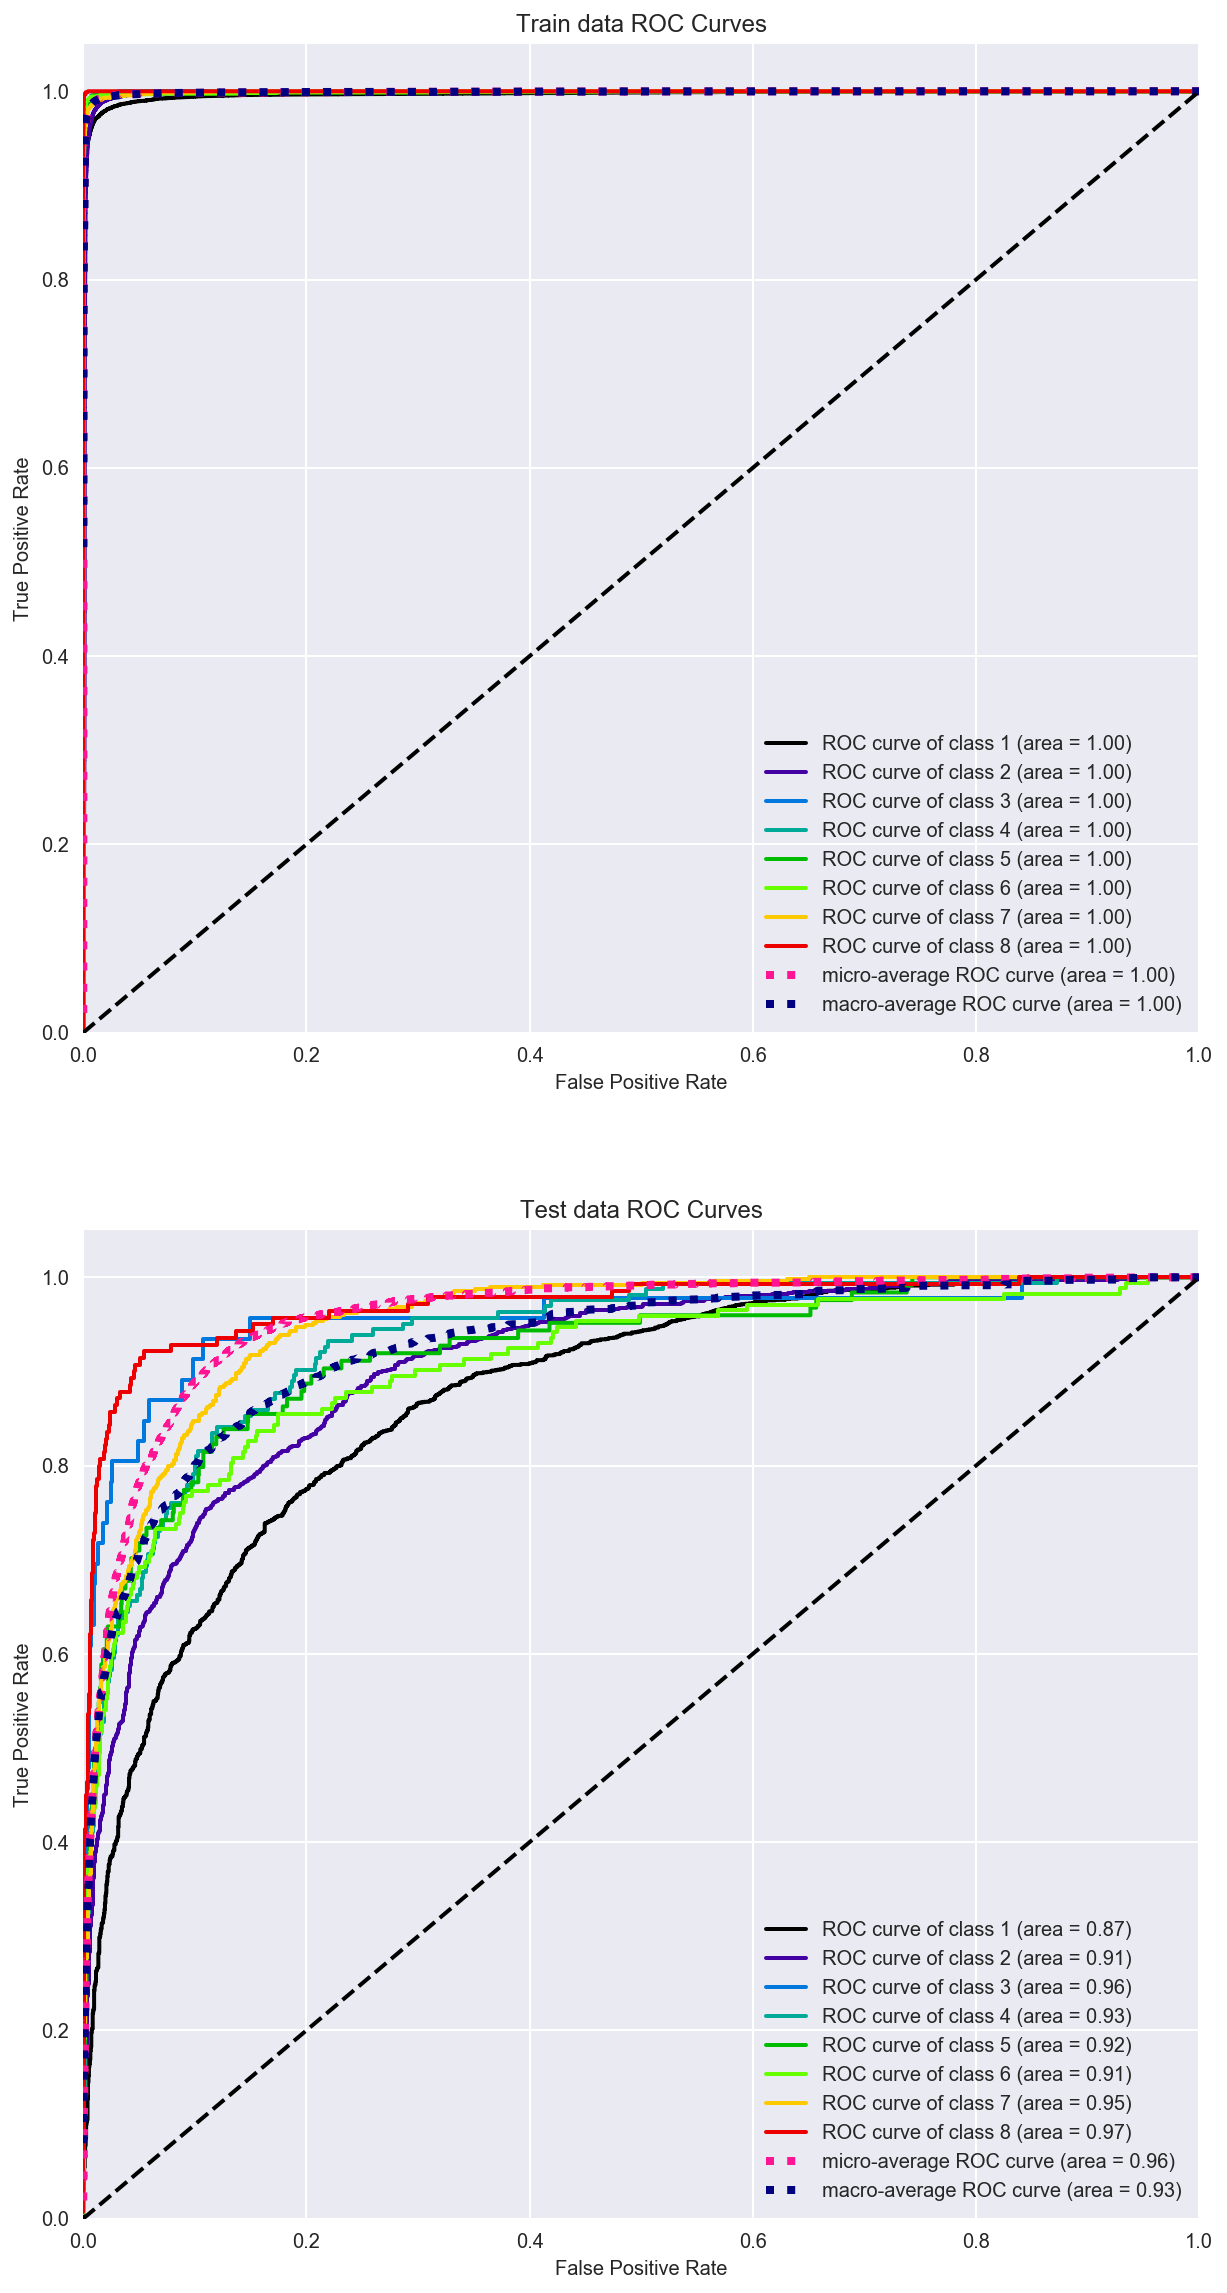

In [18]:
import scikitplot as skplt

fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

y_probas = model_F.predict_proba(X_train_F)
y_probas_T = model_F.predict_proba(X_test_F)

skplt.metrics.plot_roc_curve(y_train_F, y_probas, ax=ax1, title='Train data ROC Curves')

skplt.metrics.plot_roc_curve(y_test_F, y_probas_T, ax=ax2, title='Test data ROC Curves')

plt.show()

---

### news 본문 + 특성추출 + 제목

In [26]:
def data_resetting():
    total_ = total.filter(items=['본문',"class",'category'])
    total_ = total_.rename(columns={"본문":"cont"})
    total__ = total.filter(items=['특성추출',"class",'category'])
    total__ = total__.rename(columns={"특성추출":"cont"})
    total___ = total.filter(items=['제목',"class",'category'])
    total___ = total___.rename(columns={"제목":"cont"})
    
    t_total = pd.concat([total_,total__,total___]).reset_index(drop=True)
    
    return t_total

t_total = data_resetting()

In [27]:
t_total.tail()

,cont,class,category
136120,일자리·4차 산업혁명·교육…위원회는 `文정부 거울`,정치,8
136121,"냉랭한 한일관계, 어떻게 풀어지려나",정치,8
136122,문 대통령 “설계수명 다한 노후원전 연장가동 안한다”,정치,8
136123,[편집국에서] 사이다만 먹고 살 순 없다,정치,8
136124,“수직적 권력분산 위해 자치분권 실현 중요”,정치,8


In [28]:
from konlpy.tag import Twitter
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in twitter.pos(doc)]

In [29]:
clf = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=tokenize_pos)), 
    ("clf", MultinomialNB(alpha=0.01))
])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(t_total['cont'], t_total['category'], \
                                                    test_size=0.1, random_state=0)

len(X_train),len(X_test),len(y_train),len(y_test)

(122512, 13613, 122512, 13613)

Train 

Train confusion_matrix 

[[51684  3633   269   298   217   219  1376    98]
 [ 8156 25917    25    64   196    75   214   141]
 [  127    17  1146    35     4     0    44     1]
 [  894   423   105  2813     1    18   150    38]
 [  527   235    17     5  2079    26    68    20]
 [  992   181    39    26    58  3203   198    42]
 [ 2129   205   267    93    88   128 10371    20]
 [  348   169    10    15    17     8    47  2483]] 


Train classification_report 

             precision    recall  f1-score   support

          1       0.80      0.89      0.84     57794
          2       0.84      0.74      0.79     34788
          3       0.61      0.83      0.70      1374
          4       0.84      0.63      0.72      4442
          5       0.78      0.70      0.74      2977
          6       0.87      0.68      0.76      4739
          7       0.83      0.78      0.80     13301
          8       0.87      0.80      0.84      3097

avg / total       0.82      0.81      0.81    

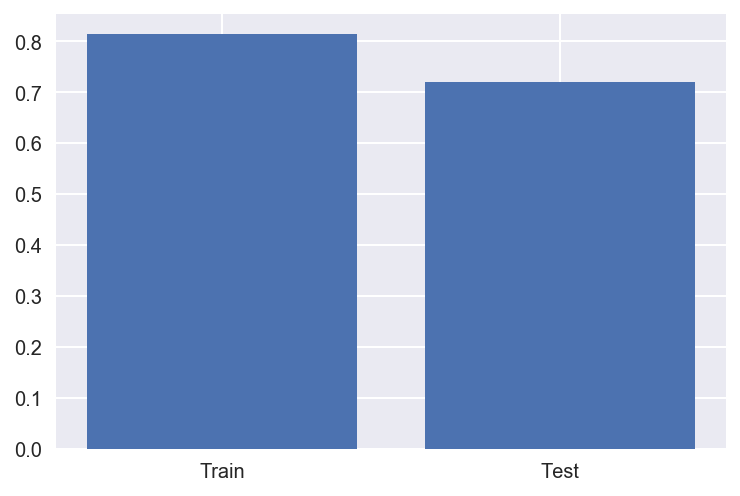

In [33]:
# def total():
model_t = clf.fit(X_train, y_train)

y_pred = model_t.predict(X_train)

print("Train", "\n")
print("Train confusion_matrix", "\n")
print(confusion_matrix(y_train, y_pred), "\n\n")
print("Train classification_report", "\n")
print(classification_report(y_train, y_pred), "\n\n")
print("Train accuracy_score", "\n")
print(round(accuracy_score(y_train, y_pred), 2), "\n\n")

print("=====================================================" , "\n\n")

y_pred_T = model_t.predict(X_test)

print("Test", "\n")
print("Test confusion_matrix", "\n")
print(confusion_matrix(y_test, y_pred_T), "\n\n")
print("Test classification_report", "\n")
print(classification_report(y_test, y_pred_T), "\n\n")
print("Test accuracy_score", "\n")
print(round(accuracy_score(y_test, y_pred_T), 2), "\n\n")

x="Train","Test"
y=accuracy_score(y_train, y_pred), accuracy_score(y_test, y_pred_T)
plt.bar(x,y)
plt.show()

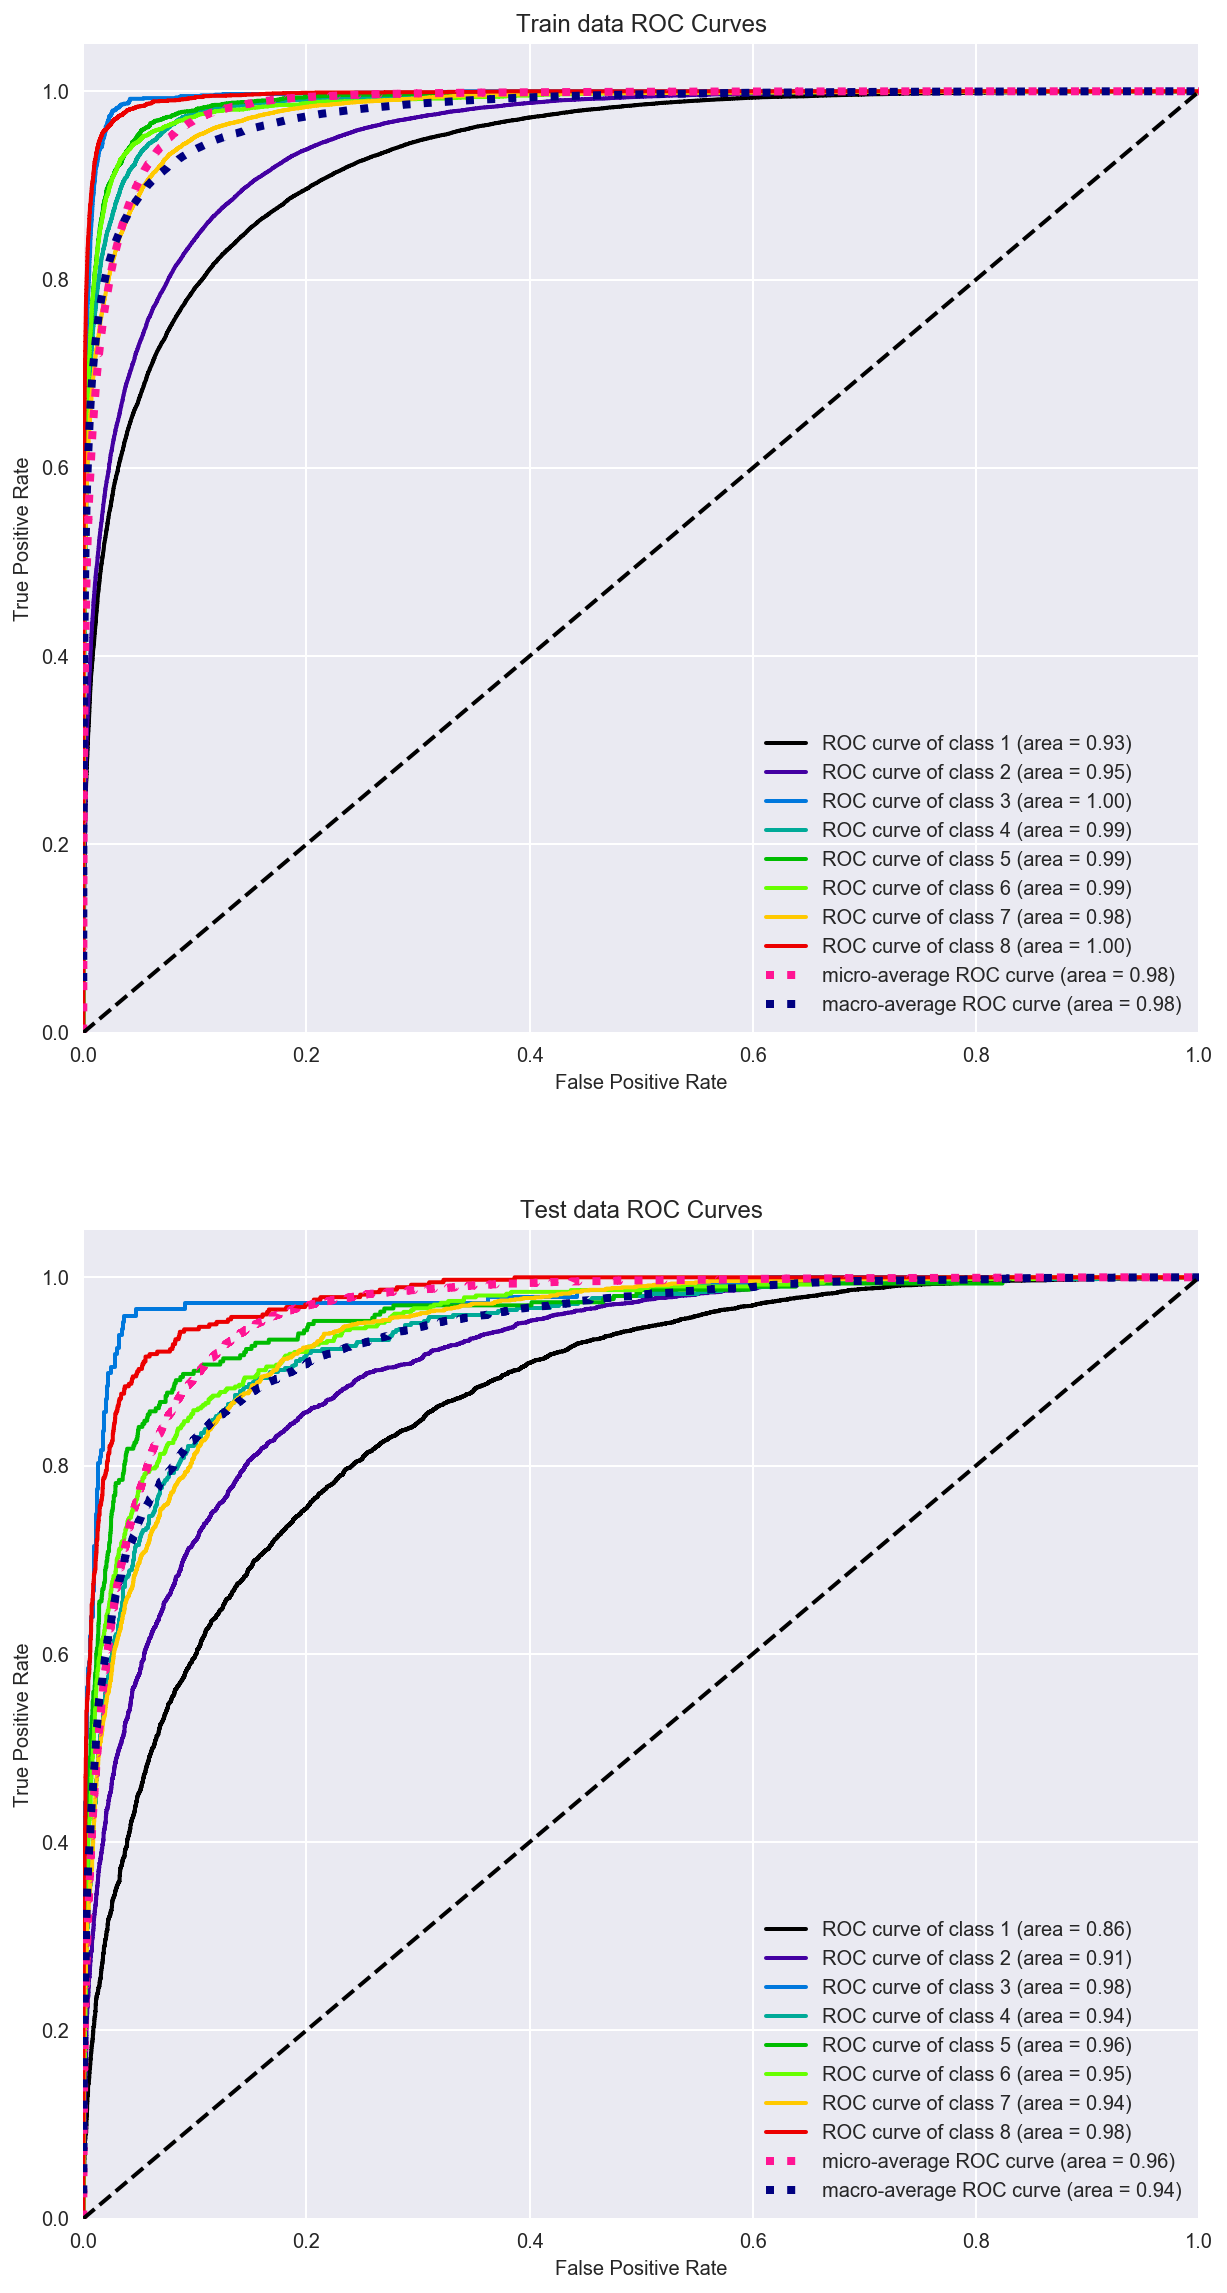

In [34]:
import scikitplot as skplt

fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

y_probas = model_t.predict_proba(X_train)
y_probas_T = model_t.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_train, y_probas, ax=ax1, title='Train data ROC Curves')

skplt.metrics.plot_roc_curve(y_test, y_probas_T, ax=ax2, title='Test data ROC Curves')

plt.show()

### 문구 Test  (과학:1, 경제:2, 스포츠:3, 국제:4, 지역:5, 사회:6, 문학:7, 정치:8)

In [37]:
X_=pd.Series("개헌")

y_pred_t = model_a.predict_proba(X_)
y_pred = model_a.predict(X_)

print(y_pred_t)
print(y_pred)

[[0.00142078 0.00139733 0.00127244 0.06951734 0.06108953 0.01926762
  0.04204247 0.80399249]]
[8]


In [32]:
X_=pd.Series(str(input("insert 1number : ")))

y_pred_t = model_a.predict_proba(X_)
y_pred = model_a.predict(X_)

print(y_pred_t)
print(y_pred)

insert 1number : 부동산
[[0.30173042 0.63621373 0.00165791 0.0095907  0.00423226 0.01091773
  0.02848678 0.00717046]]
[2]


---

### Class 축소 (과학:1, 경제:2, 스포츠:3, 국제:4, 지역:5, 사회:6, 문학:7, 정치:8)

세분화된 분류안에 과학, 경제, 스포츠등이 녹아 들어가 있기 때문에 처리 고민 후 진행 예정


목표는 예측 정확도 높이기 위함

In [36]:
total.tail()

,제목,통합 분류1,본문,특성추출,class,category
45370,일자리·4차 산업혁명·교육…위원회는 `文정부 거울`,정치>청와대,◆ 레이더뉴스 / 文정부 위원회 大해부 ◆ 문재인 대통령이 국정 5개년 계획을 차...,"위원회,청와대,4차,위원장,다음달,일자리,저출산,문재인,북방경제협력위원회,대타협,광...",정치,8
45371,"냉랭한 한일관계, 어떻게 풀어지려나",정치>외교,"우리는 지난 15일 광복 72주년을 보내고, 이제 29일 경술국치일을 맞는다. ...","일본,한일관계,한국,한일,고노,양국간,위안부,문재인,선린,백제,관광객,한국사회,주력...",정치,8
45372,문 대통령 “설계수명 다한 노후원전 연장가동 안한다”,정치>외교,문재인 대통령이 “원전과 화력발전을 줄이고 안전한 미래에너지를 늘려야 한다”고 거듭...,"미국,자유무역협정,중국,기업인,발전소,위원장,사드,경제협력,지방자치단체,신재생,7기...",정치,8
45373,[편집국에서] 사이다만 먹고 살 순 없다,정치>청와대,“공정거래위원회가 (국민들의) 막힌 곳을 뚫어주는 사이다 역할을 하고 있다.” 문재...,"한국,세월호,공정위,기간제,국민들,1류,저성장,가처분,박일근,3류,빅데이터,4차,운...",정치,8
45374,“수직적 권력분산 위해 자치분권 실현 중요”,정치,정순관 대통령소속 지방자치발전위원장은 29일 “자치분권은 시대적 흐름에 부응하는 핵...,"위원장,지방분권,정순관,4차,제2국무회의,지방세,권력분산,수직적,지방이양,인공지능,...",정치,8


In [19]:
News = pd.read_csv("인공지능 관련 뉴스메타데이터(2013.01.01-2017.08.31).CSV", encoding="cp949")

In [23]:
News['통합 분류1'].value_counts().sort_index().tail()

지역>전북       21
지역>제주       16
지역>지역일반    397
지역>충남       36
지역>충북       72
Name: 통합 분류1, dtype: int64

In [25]:
News[News['통합 분류1'] == "지역>경북"].tail(2)

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,개체명(인물),개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
42802,http://www.bigkinds.or.kr/news/newsDetailView....,20170703,매일경제,"김정욱,이승훈,손재권,문지웅,김강래,신현규,이영욱","페북 ""인턴 한달에 1천만원""…경영상식 파괴하는 `IT 백상어`",지역>경북,NaN,NaN,NaN,NaN,NaN,마크 필즈김정욱빌 포드손재권,실리콘밸리미국페북서울메카골드만삭스팰로앨토아마존로버트제프리,구글GMFAANG산업부넷플릭스포드아마존페이스북엔비디아매경실리콘밸리포럼CNBC애플마이...,"페북,인턴,1천만,경영상식,파괴,백상어,매경실리콘밸리포럼,D-,4차,산업혁명,메카,...","실리콘밸리,스타트업,구글,페이스북,자동차,포드,백상아리들,기업들,백상아리,산업혁명,...",◆ 매경실리콘밸리포럼 D-2 / 4차산업혁명 메카 실리콘밸리를 가다 ② ◆ '여름 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...
47539,http://www.bigkinds.or.kr/news/newsDetailView....,20170829,대구일보,문정화,"이홍희 경북도의원, 도 차원 AI산업 육성 정책 촉구",지역>경북,지역>대구,IT_과학>IT_과학일반,NaN,NaN,NaN,이,금오테크노밸리경북산학융합지구구미판교테크노밸리성남,경북도경북경북도의회AI연구소,"이홍희,경북도의원,촉구,차원,AI,산업,육성,정책,이홍희,구미5,경북도의원,청년,인...","ai,경북도,성남,구미,경북도의원,임시회,판교테크노밸리,이홍희,환경조성,무인기,대국...",이홍희(구미5) 경북도의원이 청년 인재양성과 일자리 창출을 위한 경북도 차원의 인공...,NaN


---